In [1]:
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 68.8 MB/s eta 0:00:00


In [2]:
# Bibliotecas
from sklearn.decomposition import FastICA
import rasterio as rio
from rasterio.plot import reshape_as_image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Lendo imagem
with rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif') as src:
    img = reshape_as_image(src.read())

In [5]:
# Redimensionando dado para rodar o ICA
img_2d = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [7]:
# Rodando ICA
transformer = FastICA(n_components=6, random_state=0, whiten='unit-variance')
ica = transformer.fit_transform(img_2d)

In [8]:
# Retornando resultado para as dimensões originais
result = ica.reshape(img.shape)

In [14]:
#Função de expansão
def expansao(arr, percent_ini=2, percent_fim=98):
    s = np.zeros_like(arr)
    x,y = 0,255
    w = np.percentile(arr, percent_ini)
    z = np.percentile(arr, percent_fim)
    p = x + (arr - w) * (y - x) / (z - w)
    p[p<x] = x
    p[p>y] = y
    s = p
    return s

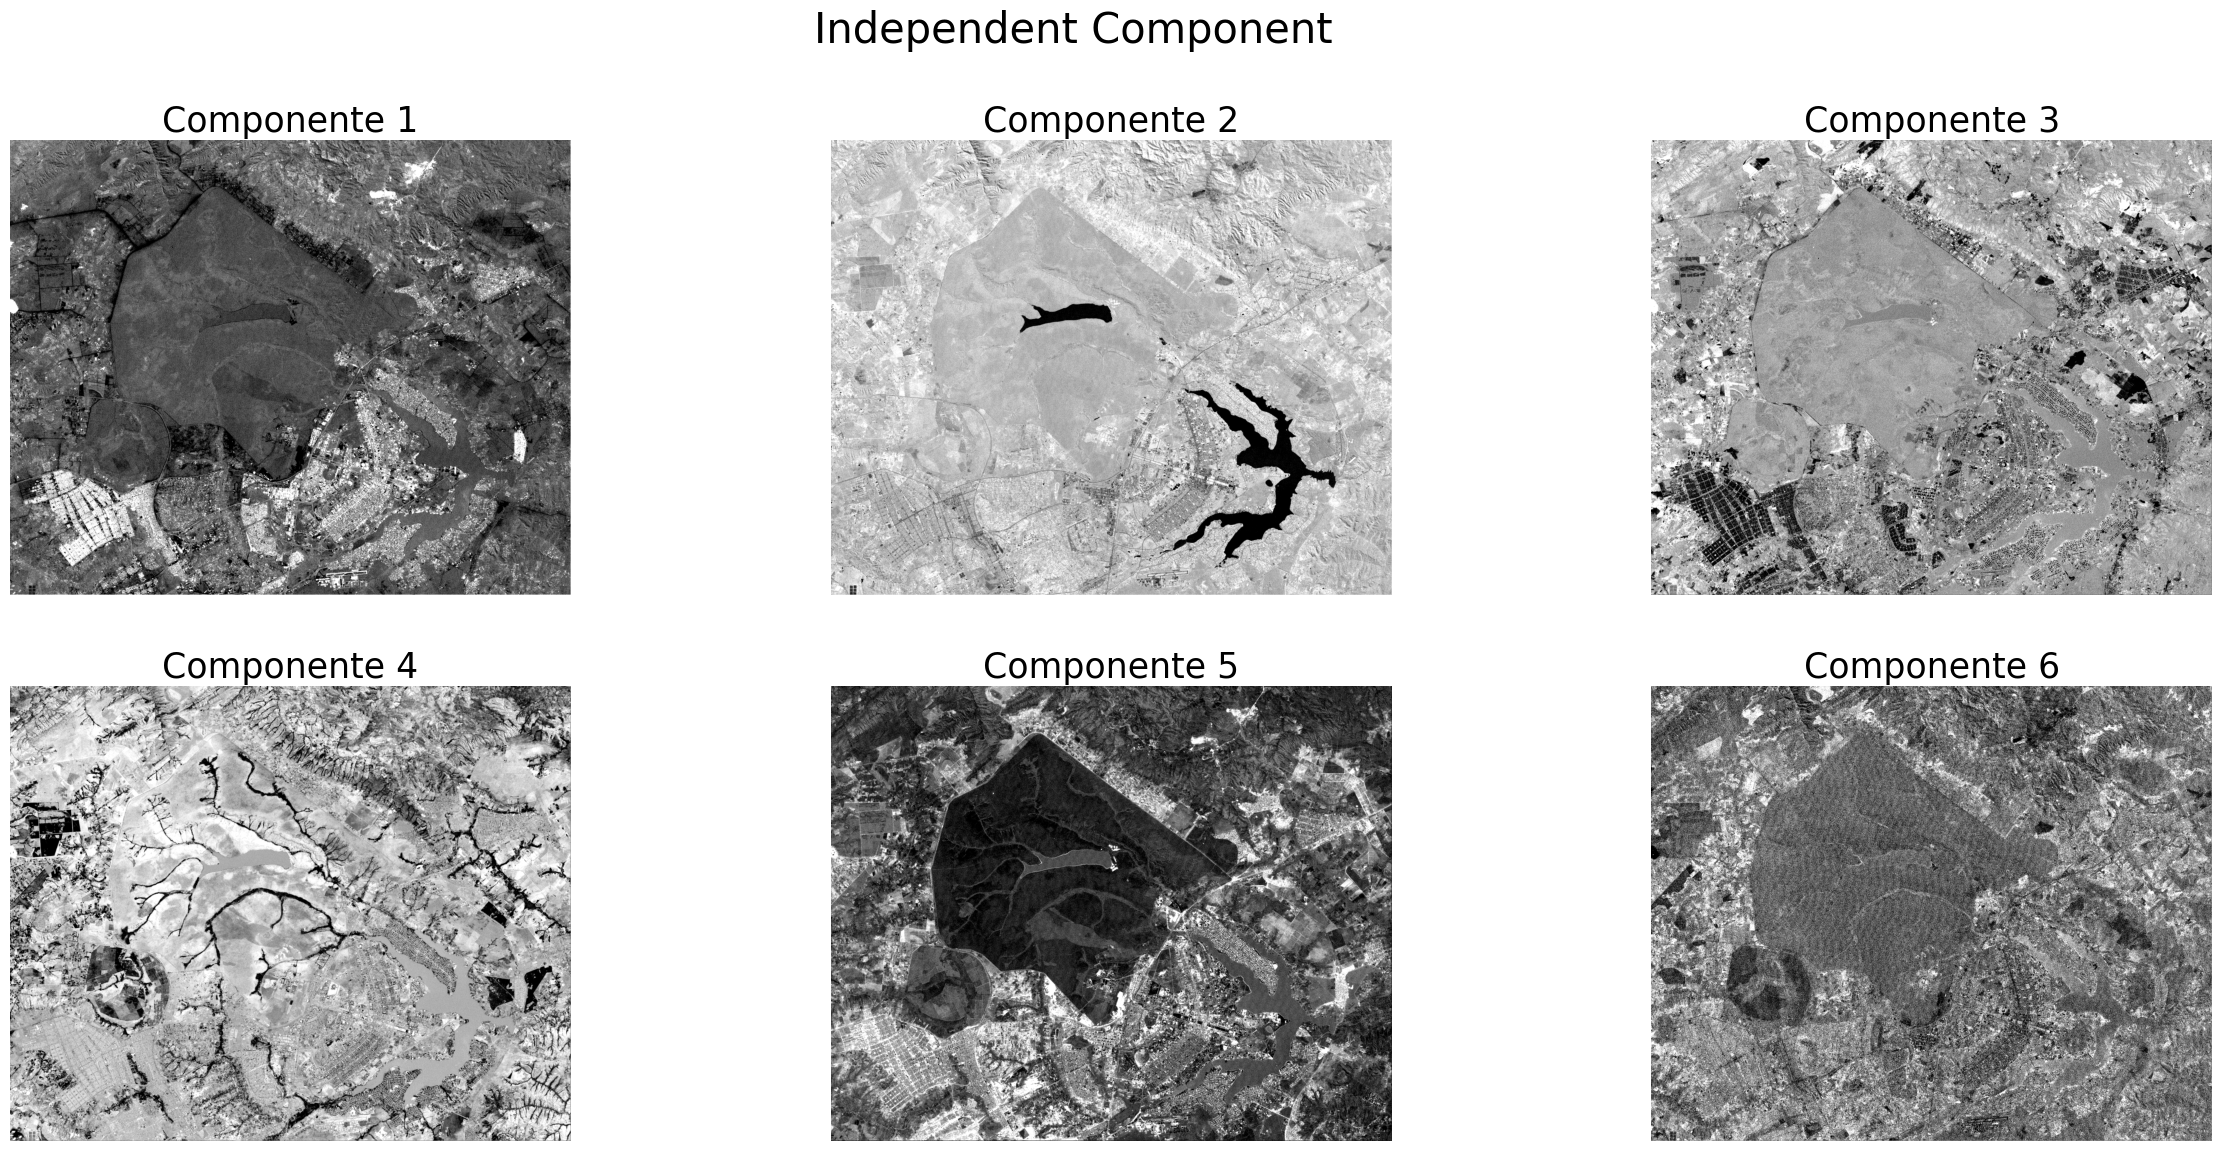

In [15]:
#Plotando
fig,axes = plt.subplots(2,3,figsize=(30,13),sharex='all', sharey='all')
fig.suptitle('Independent Component', fontsize=30)

axes = axes.ravel()
for i in range(result.shape[2]):
    axes[i].imshow(expansao(result[:,:,i]),cmap='gray')
    axes[i].set_title('Componente '+str(i+1),fontsize=25)
    axes[i].axis('off')